In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import geopandas as gpd

In [2]:
data=pd.read_csv("/kaggle/input/cost-of-international-education/International_Education_Costs.csv")
data.head(5)

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


In [4]:
data.isnull().sum()

Country              0
City                 0
University           0
Program              0
Level                0
Duration_Years       0
Tuition_USD          0
Living_Cost_Index    0
Rent_USD             0
Visa_Fee_USD         0
Insurance_USD        0
Exchange_Rate        0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.describe()

,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,2.836825,16705.016538,64.437486,969.206174,211.396913,700.077178,623.000695
std,0.945449,16582.385275,14.056333,517.154752,143.435740,320.374875,3801.746134
min,1.000000,0.000000,27.800000,150.000000,40.000000,200.000000,0.150000
25%,2.000000,2850.000000,56.300000,545.000000,100.000000,450.000000,0.920000
50%,3.000000,7500.000000,67.500000,900.000000,160.000000,650.000000,1.350000
75%,4.000000,31100.000000,72.200000,1300.000000,240.000000,800.000000,7.150000
max,5.000000,62000.000000,122.400000,2500.000000,490.000000,1500.000000,42150.000000


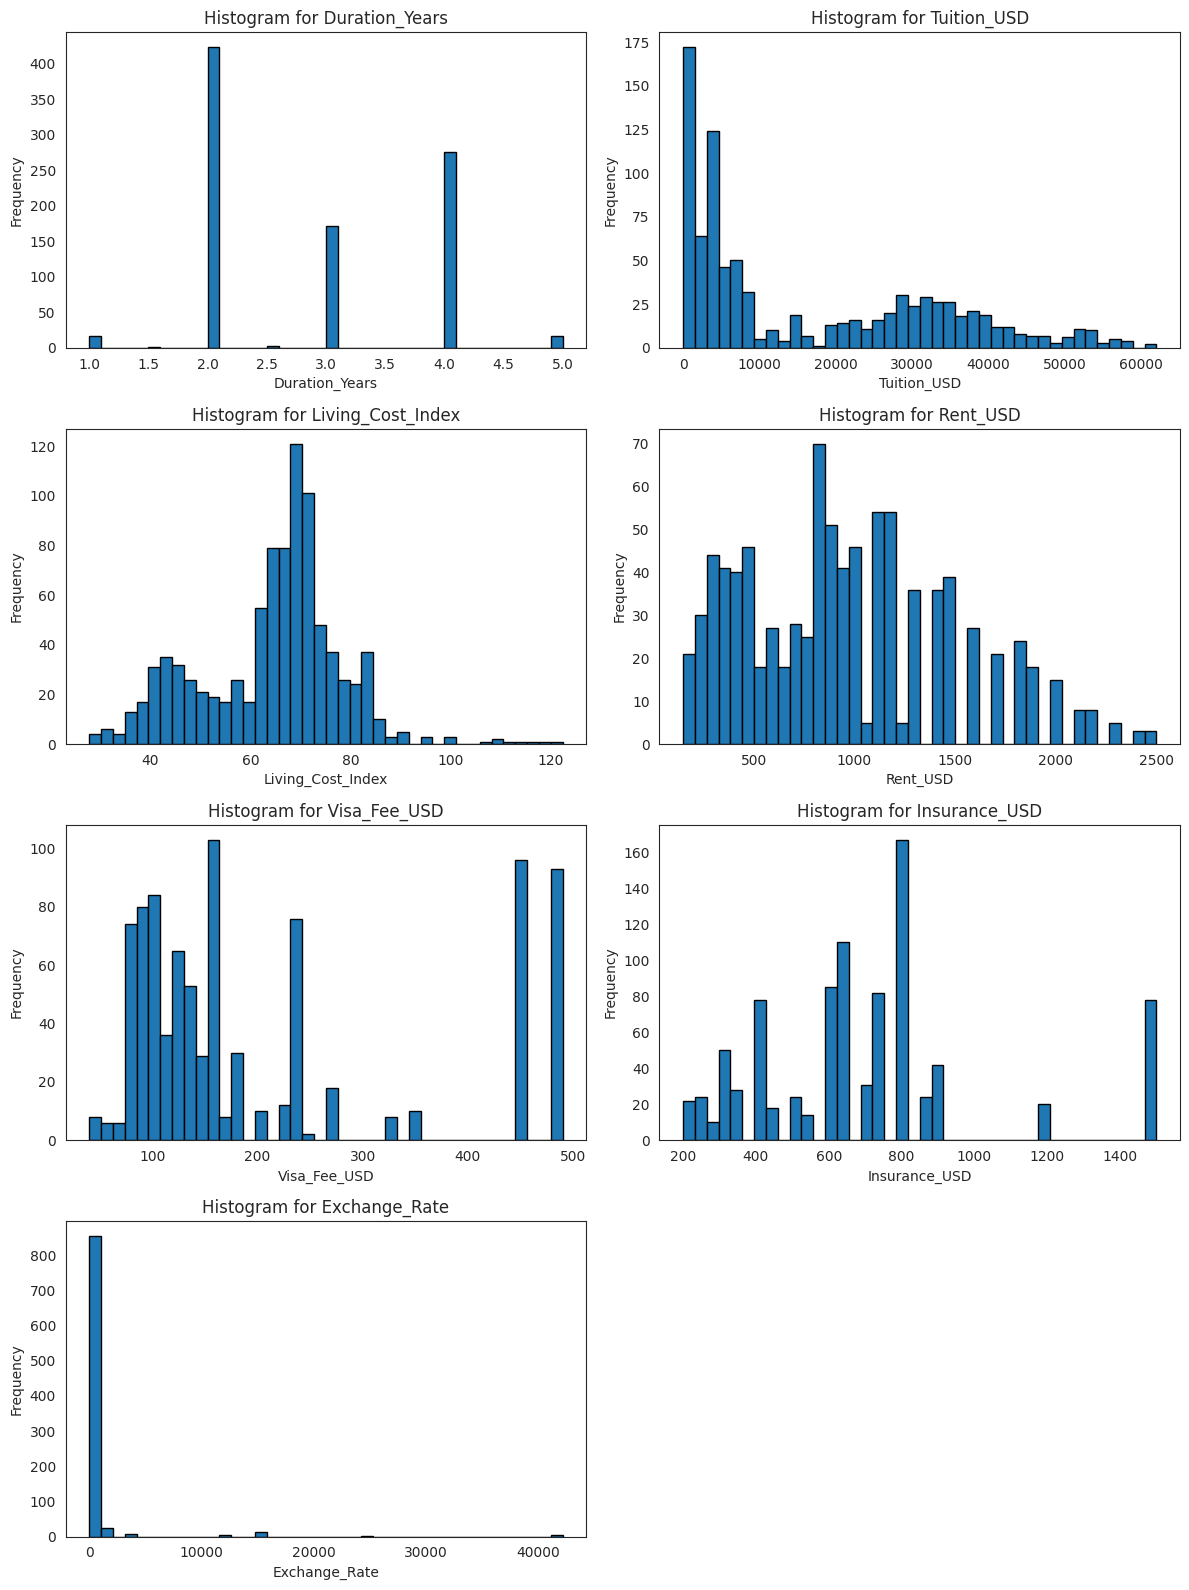

In [7]:
sns.set_style("white")
num_col = data.select_dtypes(include="number").columns

fig, axes = plt.subplots(nrows=(len(num_col) + 1) // 2, ncols=2, figsize=(12, 4 * ((len(num_col) + 1) // 2)))
axes = axes.flatten()

for i, col in enumerate(num_col):
    axes[i].hist(data[col].dropna(), bins=40, edgecolor='black')
    axes[i].set_title(f"Histogram for {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

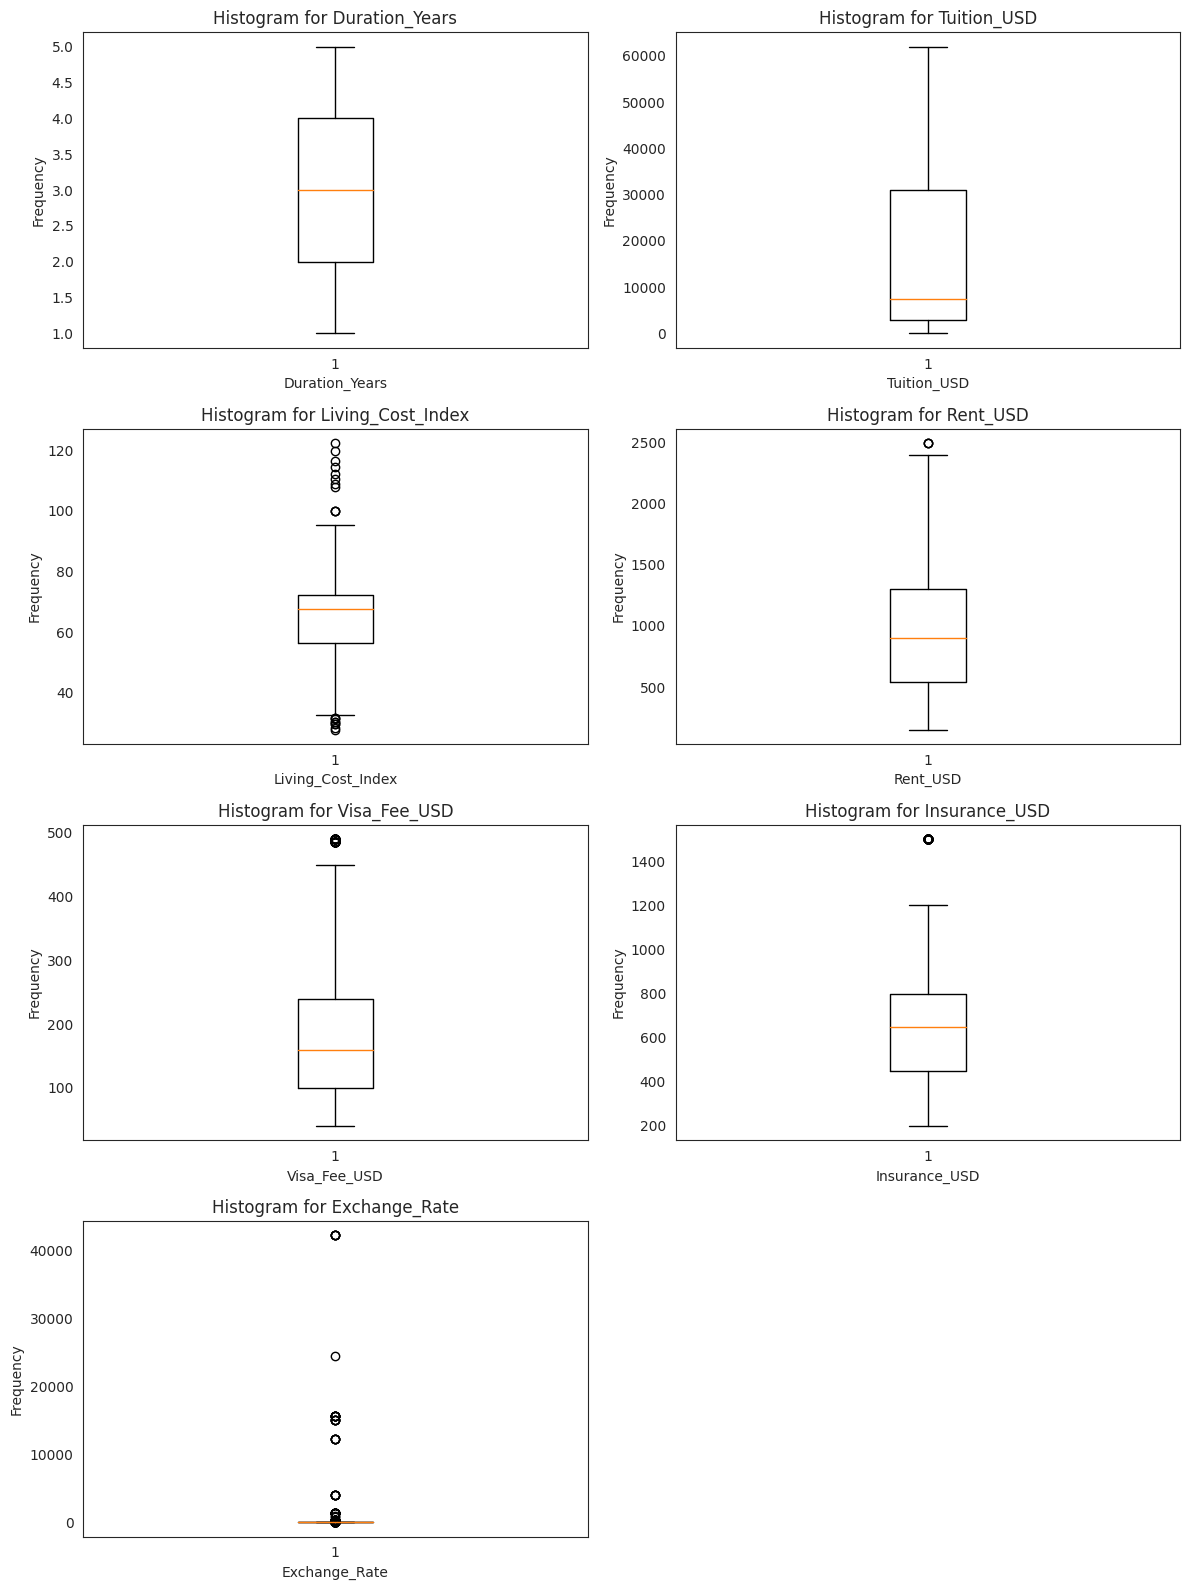

In [8]:

fig, axes = plt.subplots(nrows=(len(num_col) + 1) // 2, ncols=2, figsize=(12, 4 * ((len(num_col) + 1) // 2)))
axes = axes.flatten()

for i, col in enumerate(num_col):
    axes[i].boxplot(data[col])
    axes[i].set_title(f"Histogram for {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [9]:
data.head(4)

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52


# Average Tuition Fee per Country

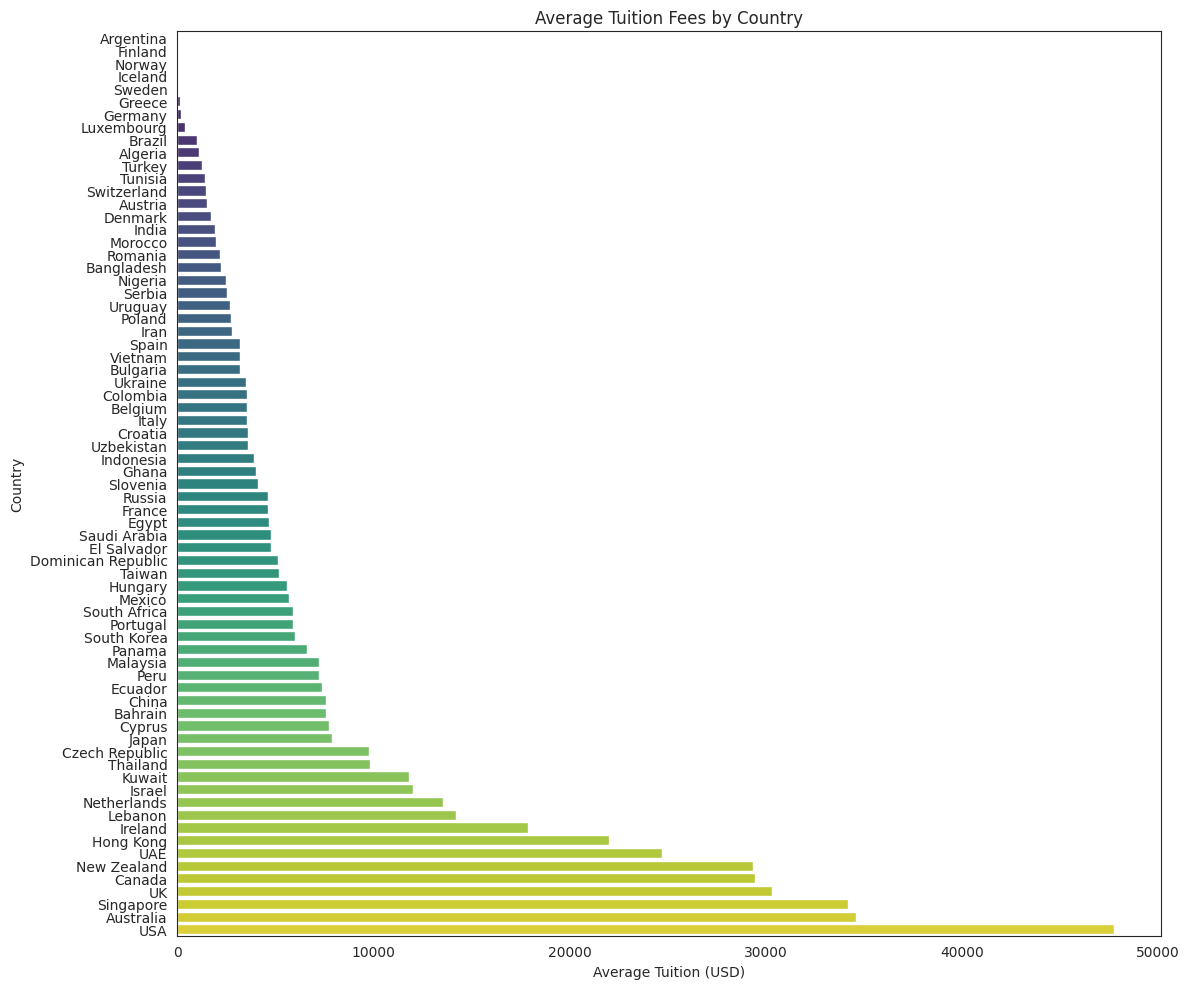

In [10]:
avg_fee=data.groupby("Country")["Tuition_USD"].mean().sort_values()
plt.figure(figsize=(12, 10))
sns.barplot(x=avg_fee.values, y=avg_fee.index, palette='viridis')
plt.title('Average Tuition Fees by Country')
plt.xlabel('Average Tuition (USD)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Top 10 Expensive Countries

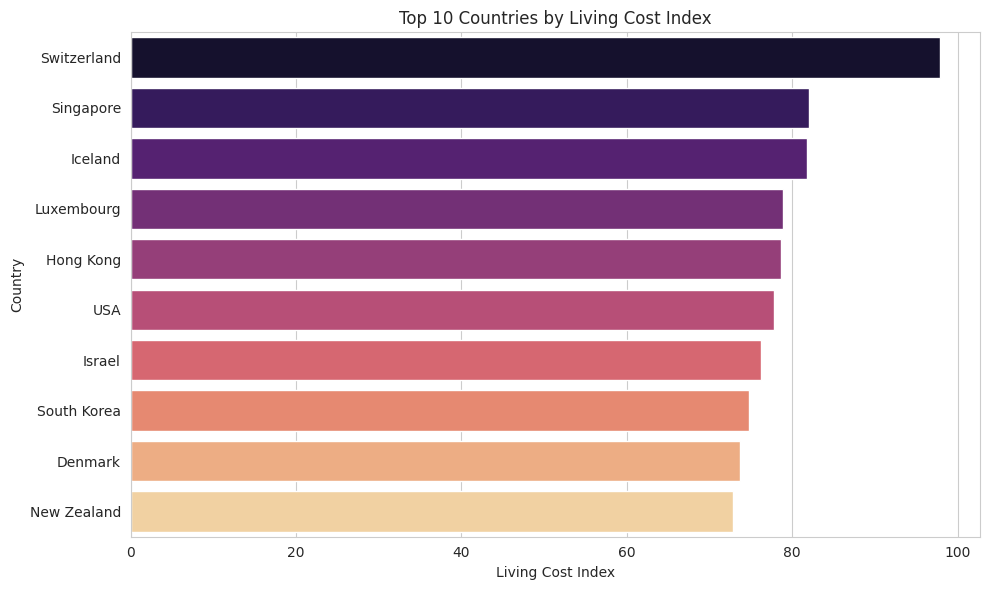

In [11]:
top_living_cost = data[['Country', 'Living_Cost_Index']].dropna()
top_living_cost = top_living_cost.groupby('Country', as_index=False)['Living_Cost_Index'].mean()
top_living_cost = top_living_cost.sort_values(by='Living_Cost_Index', ascending=False).head(10)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Living_Cost_Index', y='Country', data=top_living_cost, palette='magma')
plt.title('Top 10 Countries by Living Cost Index')
plt.xlabel('Living Cost Index')
plt.ylabel('Country')

plt.tight_layout()
plt.show()


# Total Estimated Annual Cost by Country

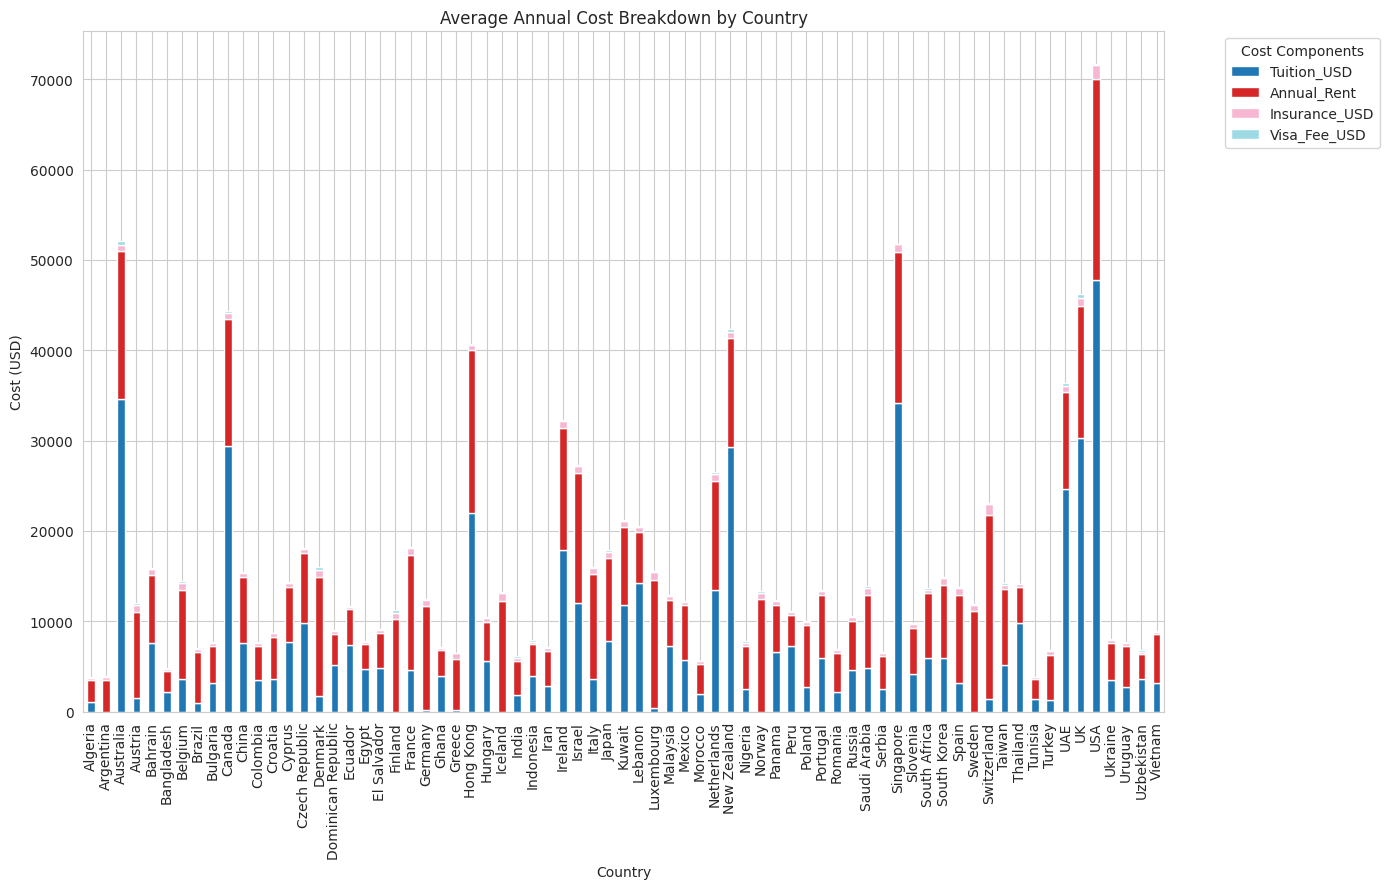

In [12]:
data['Annual_Rent'] = data['Rent_USD'] * 12
data['Total_Cost'] = data['Tuition_USD'] + data['Annual_Rent'] + data['Insurance_USD'] + data['Visa_Fee_USD']

cost_components = ['Tuition_USD', 'Annual_Rent', 'Insurance_USD', 'Visa_Fee_USD']
costs = data.groupby('Country')[cost_components].mean()

costs.plot(kind='bar', stacked=True, figsize=(14, 9), colormap='tab20')
plt.title('Average Annual Cost Breakdown by Country')
plt.xlabel('Country')
plt.ylabel('Cost (USD)')
plt.legend(title='Cost Components', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_13/3882476927.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


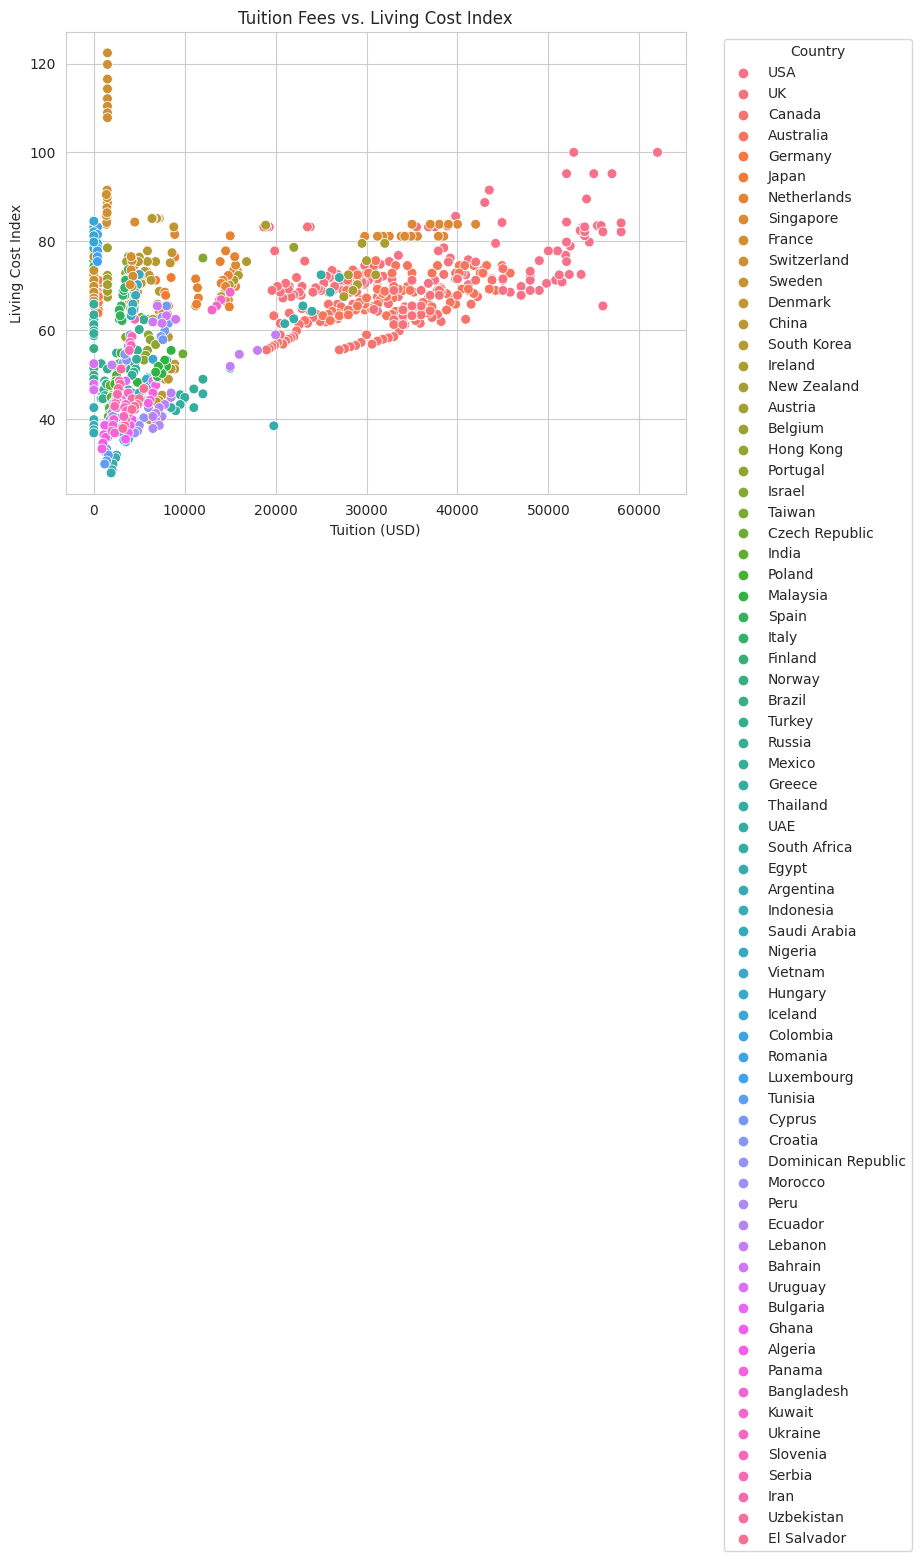

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Tuition_USD', y='Living_Cost_Index', hue='Country', s=50)
plt.title('Tuition Fees vs. Living Cost Index')
plt.xlabel('Tuition (USD)')
plt.ylabel('Living Cost Index')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Tuition fee distribution by Program Level

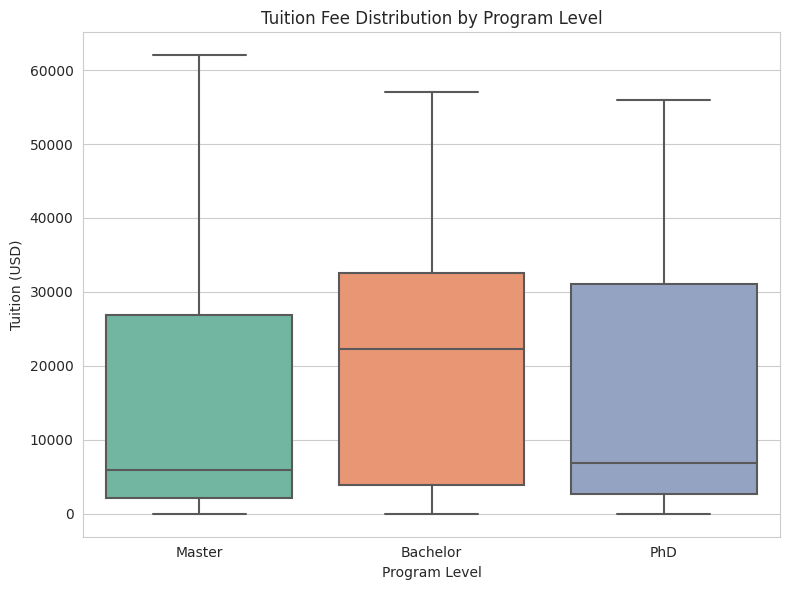

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Level', y='Tuition_USD', palette='Set2')
plt.title('Tuition Fee Distribution by Program Level')
plt.xlabel('Program Level')
plt.ylabel('Tuition (USD)')
plt.tight_layout()
plt.show()

# Predictive Modeling

In [15]:
data.head(5)

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,Annual_Rent,Total_Cost
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00,26400,83460
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79,21600,64085
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35,19200,58835
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52,16800,59900
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92,13200,14325


In [16]:
le=LabelEncoder()
data["Country"]=le.fit_transform(data["Country"])
data["City"]=le.fit_transform(data["City"])
data["University"]=le.fit_transform(data["University"])
data["Program"]=le.fit_transform(data["Program"])
data["Level"]=le.fit_transform(data["Level"])

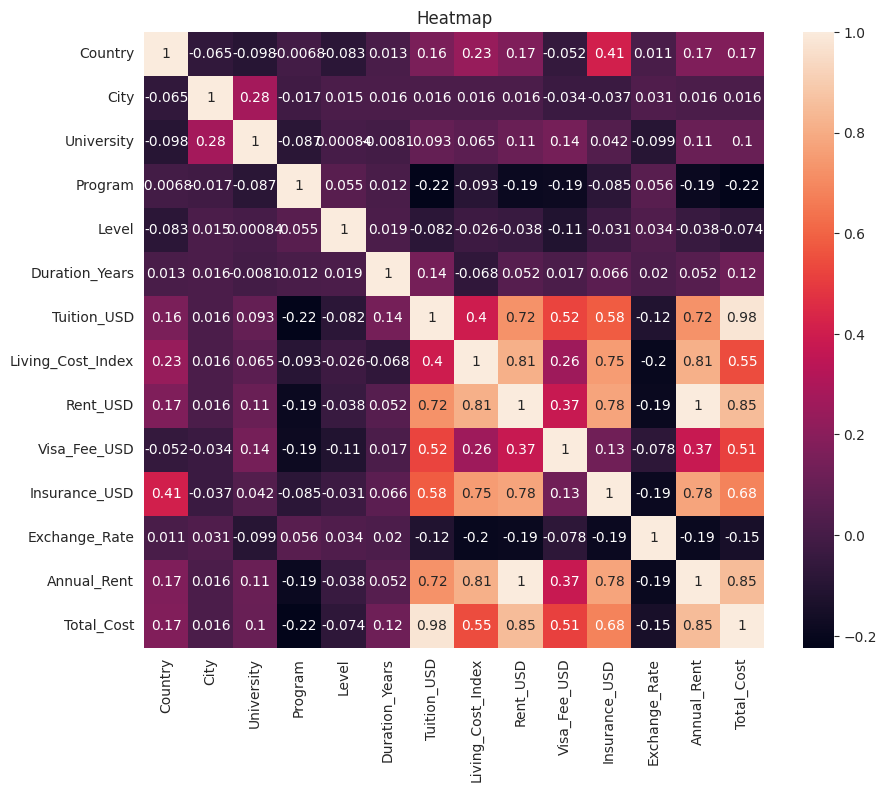

In [17]:
plt.figure(figsize=(10,8))
plt.title("Heatmap")
sns.heatmap(data.corr(),annot=True)
plt.show()

In [18]:
x=data.drop(["Living_Cost_Index"],axis=1)
y=data["Living_Cost_Index"]

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [20]:
rfr=RandomForestRegressor()

In [21]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [22]:
y_pred=rfr.predict(x_test)
print(y_pred)

[49.167 69.455 70.051 60.956 51.187 42.692 70.207 67.978 71.064 73.852
 62.037 78.115 65.495 70.851 63.16  51.863 82.74  69.609 51.579 57.124
 63.551 72.465 72.633 74.861 68.5   70.98  73.    80.805 80.46  61.736
 67.816 69.401 78.656 48.885 74.992 46.348 39.673 68.628 75.214 68.947
 85.928 66.115 66.966 66.136 59.015 78.45  59.1   65.607 69.036 63.998
 62.667 78.586 68.177 69.674 78.492 66.277 47.698 46.58  69.384 78.032
 37.632 46.582 73.855 70.255 70.574 68.848 71.474 37.423 68.48  56.775
 64.608 70.803 76.375 75.516 57.94  77.634 77.916 80.334 48.791 72.842
 67.196 79.925 62.822 44.438 77.926 57.183 71.164 57.915 63.935 43.062
 69.987 39.628 71.779 63.674 64.167 68.26  45.104 65.192 69.667 58.681
 66.179 69.678 64.486 47.356 69.208 44.757 75.599 73.977 59.922 67.515
 73.309 62.152 72.435 39.696 73.08  88.004 73.792 73.159 65.268 69.846
 49.241 67.498 56.316 47.165 82.422 68.784 73.16  65.167 46.917 72.105
 85.975 62.121 69.966 73.084 41.982 66.281 68.659 80.498 46.366 58.891
 43.59

In [23]:
r2=r2_score(y_test,y_pred)
print(f" R2 Score : {r2*100}")

 R2 Score : 95.80756546528495


# If you like my notebook , don't forget to UPVOTE ! 